<h1 align=left><font size = 5>Predicting Caravan Customers</font></h1>

Capstone Project: Insurance Company Benchmark

CIND820 Big Data Analytics Project

Student Name : Manohari Wijesooriya

*About weka Package*

This model is based on using  ML package Weka for machine learning. Weka is a famous machine learning software and a set of libraries that one can use within a programming language. Weka was created at the University of Waikato, New Zealnd (https://www.cs.waikato.ac.nz/ml/weka/). It is accompanied with a text book of data mining taught in schools around the world (https://www.cs.waikato.ac.nz/ml/weka/book.html). The advantage of using Weka's Python package is that the implementation of algorithms is complete, comprehsive and easy to use. Let's see below.


##  **Approach**

*  Exploratory Data Analysis (EDA):

   *  Visit EDA   [here](https:////github.com/manohariw44/TMU-Big-Data-Analytics-Capstone-Project/blob/da078af84674f2f8550782067226fa07c35b539d/PY01_Capst_EDA.ipynb)
     


*  Preprocessing:

   *  Encoding the categorical features
       *  Categorical to One-Hot (numeric) Encoding
   *  Split the dataset into training and testing sets
   *  Create cross-validation sets

*  Classification Model:

   *  Approach 1 - Multinomial Naïve Bayes:
      *  Choose traning/test split
      *  Use Naïve Byes classifier from Python sklearn and weka packages
      *  Evaluate model using confusion matrix
      

   *  Approach 2 - Decision Tree :
      * Choose training/test split, maximum depth of tree
      * Evaluate model using confusion matrix

   *  Approach 3 - Random forest :
      * Start by randomly selecting a subset of the training data, with replacement.
      *  Select features and build decision tree
      *  Repeat steps
      *  Combine the predictions of all trees to make a final prediction


   *  Approach 4 - Logistic regression:
      

   *  Approach 5 - K Nearest Neighbours :   
      

*  Feature Selection
    *  Correlation Matrix
    *  Univarate testing  - Classification task
        *  Examine chi-squre score and p value for each attribute
    * Recursive Feature Elimination with Cross validation
    *  k fold cross validation
        * split training data into k equally sized subsets or folds
        * The model is trained on k-1 of these folds and tested on the remaining fold.
        * The performance of the model is then averaged across all k folds


* Association Rules:

  *  Approach 1 - Apriori :
     
      * Select features using Chi-square Test, Fisher’s Score

  *  Approach 2 - k-means algorithm :

  * Model selection criteria
     * high accuracy, high recall on target = 1




First install Weka's Python package.

In [ ]:
!pip install numpy
!pip install python-javabridge
! pip install python-weka-wrapper3

Weka was built on Java, and below we shall be setting Java and launching it in Python environment. Don't worry about understanding this code.

In [ ]:
import os
import sys
sys.path
sys.path.append("/usr/lib/jvm/java-11-openjdk-amd64/bin/")
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64/"



In [ ]:
import weka.core.jvm as jvm
jvm.start()

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


We shall now upload a dataset file. Weka works with arff format easily, it can load CSV too. We shall upload .arff file because I have defined the correct data types of variables (cagtegorical or numerical) in it already.

convert csv to arff file
https://ikuz.eu/csv2arff/

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ticdata2000_w_hd.arff to ticdata2000_w_hd (5).arff


Let's load our dataset into memory. It will be loaded using the following code. Dataset file that I have uplaoded is german_credit.arff. Note this loaded data in moemeory is not a Pandas' data frame.

In [ ]:
from weka.core.converters import Loader
from weka.core.classes import Random
from weka.classifiers import Classifier, Evaluation

In [232]:
loader = Loader(classname="weka.core.converters.ArffLoader")
data_file = 'ticdata2000_w_hd (5).arff'
#data_file="churn.arff"
#data_file="bank.arff"
data = loader.load_file(data_file)

print('Data set size: ', data.num_instances)

Data set size:  5822


In [233]:
for i in range(data.num_attributes):
  print ("index ",i)
  print(data.attribute(i))

index  0
@attribute sd_cust_subtype {1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41}
index  1
@attribute sd_no_of_houses {1,2,3,4,5,6,7,8,10}
index  2
@attribute sd_avg_household {1,2,3,4,5}
index  3
@attribute sd_avg_age_band {1,2,3,4,5,6}
index  4
@attribute sd_cust_maintype {1,2,3,4,5,6,7,8,9,10}
index  5
@attribute sd_religion_catholic {0,1,2,3,4,5,6,7,8,9}
index  6
@attribute sd_religion_protestant {0,1,2,3,4,5,6,7,8,9}
index  7
@attribute sd_religion_other {0,1,2,3,4,5}
index  8
@attribute sd_religion_no {0,1,2,3,4,5,6,7,8,9}
index  9
@attribute sd_rel_married {0,1,2,3,4,5,6,7,8,9}
index  10
@attribute sd_rel_living_tg {0,1,2,3,4,5,6,7}
index  11
@attribute sd_rel_other {0,1,2,3,4,5,6,7,8,9}
index  12
@attribute sd_rel_no_singles {0,1,2,3,4,5,6,7,8,9}
index  13
@attribute sd_hshold_wo_children {0,1,2,3,4,5,6,7,8,9}
index  14
@attribute sd_hshold_w_children {0,1,2,3,4,5,6,7,8,9}
index  15
@attribute sd_education_highe

 ➰Re run with selected features. ➰

In [234]:
# this is to use run model again with feature selection.
filtered_data=data.subset(col_range='42, 44, 47, 59, 61, 68, 82, 85,86')
data = filtered_data


In [235]:
#Let's look at the attributes and their types
# We have two data types here: categorical and numeric.
for i in range(data.num_attributes):
  print ("index ",i)
  print(data.attribute(i))

index  0
@attribute sd_income_avg {0,1,2,3,4,5,6,7,8,9}
index  1
@attribute po_ins_pol_thirdparty_pvt {0,1,2,3}
index  2
@attribute po_ins_pol_car {0,4,5,6,7,8}
index  3
@attribute po_ins_pol_fire {0,1,2,3,4,5,6,7,8}
index  4
@attribute po_ins_pol_boat {0,1,2,3,4,5,6}
index  5
@attribute po_no_ins_pol_car {0,1,2,3,4,6,7}
index  6
@attribute po_no_ins_pol_boat {0,1,2}
index  7
@attribute po_no_ins_pol_socialsecurity {0,1,2}
index  8
@attribute po_ins_pol_caravan {0,1}


# Preprocessing

Index of class attribute in our data is 85--po_ins_pol_caravan. It can be observed above. I am setting up class attribute here.

In [236]:

# index of class atrribute is 0 (Creditability) for German credit card
# index of class attribute is 20(Churn) for Churn data set
# index of class attribute is 16(y) for bank data set
# Again, you can see all the index numbers for attributes by running the previous cell
#class_idx=85 #intial dataset
class_idx=8  # dataset with selected features
print('Will be classifying on: ', data.attribute(class_idx))
data.class_index = class_idx


Will be classifying on:  @attribute po_ins_pol_caravan {0,1}


Time to split dataset into train and test set.

In [267]:
# we will run the model changing training/test split and seed
# Splitting 66% for training and 34% for testing using a seed of 1 for random number generator
split = 60.0
rand_seed = 6
train, test = data.train_test_split(split, Random(rand_seed))

In [243]:
print('train set size: ', train.num_instances)
print('test set size: ', test.num_instances)

train set size:  4949
test set size:  873


# Classification Model

**Approach 1 - Multinomial Naïve Bayes**

**Naive Bayes**

Below is the code to run Naive Bayes algorithm. It is a different version of Naive Bayes that is suited to both numeric and categorical features(atrributes or variables).
 (https://weka.sourceforge.io/doc.dev/weka/classifiers/bayes/NaiveBayes.html)

In [244]:
nb = Classifier(classname="weka.classifiers.bayes.NaiveBayes")
nb.build_classifier(train)
#let's understand the NB model by printing it
print(nb)

Naive Bayes Classifier

                                Class
Attribute                           0      1
                               (0.94) (0.06)
sd_income_avg
  0                               23.0    1.0
  1                               45.0    2.0
  2                              524.0   19.0
  3                             1597.0   63.0
  4                             1468.0  117.0
  5                              566.0   60.0
  6                              277.0   21.0
  7                               94.0   16.0
  8                               50.0    8.0
  9                               17.0    1.0
  [total]                       4661.0  308.0

po_ins_pol_thirdparty_pvt
  0                             2832.0  127.0
  1                              177.0    8.0
  2                             1638.0  164.0
  3                                8.0    3.0
  [total]                       4655.0  302.0

po_ins_pol_car
  0                             2375.0   62.0
  4      

In [245]:
# Time for evaluation on the test set
evl_nb = Evaluation(train)
evl_nb.test_model(nb, test)
print(evl_nb.summary())


Correctly Classified Instances         819               93.8144 %
Incorrectly Classified Instances        54                6.1856 %
Kappa statistic                          0.2228
Mean absolute error                      0.1176
Root mean squared error                  0.239 
Relative absolute error                106.2141 %
Root relative squared error            102.8486 %
Total Number of Instances              873     



In [246]:
# Here are all the metrics
#print ("Class Index ", class_idx)
print("Classes at different positions are ",data.attribute(class_idx))

print("confusion Matrix")
#Note that the TP here will be for the class at the first position printed by the previous line and TN will be for the class at second position
print(evl_nb.confusion_matrix)

###############
# Print metrics for the first class
##############
class_position=0
print("")
print ("Evaluation from the perspective of class at position "+ str(class_position))
print("TP ",evl_nb.true_positive_rate(class_position))
print("FP",evl_nb.false_positive_rate(class_position))
print("Precision ",evl_nb.precision(class_position))
print("Recall ",evl_nb.recall(class_position))


###############
# Print metrics for the second class
##############
class_position=1
print("")
print ("Evaluation from the perspective of class at position "+ str(class_position))
print("TP ",evl_nb.true_positive_rate(class_position))
print("FP",evl_nb.false_positive_rate(class_position))
print("Precision ",evl_nb.precision(class_position))
print("Recall ",evl_nb.recall(class_position))


Classes at different positions are  @attribute po_ins_pol_caravan {0,1}
confusion Matrix
[[810.  13.]
 [ 41.   9.]]

Evaluation from the perspective of class at position 0
TP  0.9842041312272175
FP 0.82
Precision  0.9518213866039953
Recall  0.9842041312272175

Evaluation from the perspective of class at position 1
TP  0.18
FP 0.015795868772782502
Precision  0.4090909090909091
Recall  0.18


NB evaluation results form 2 iterations.

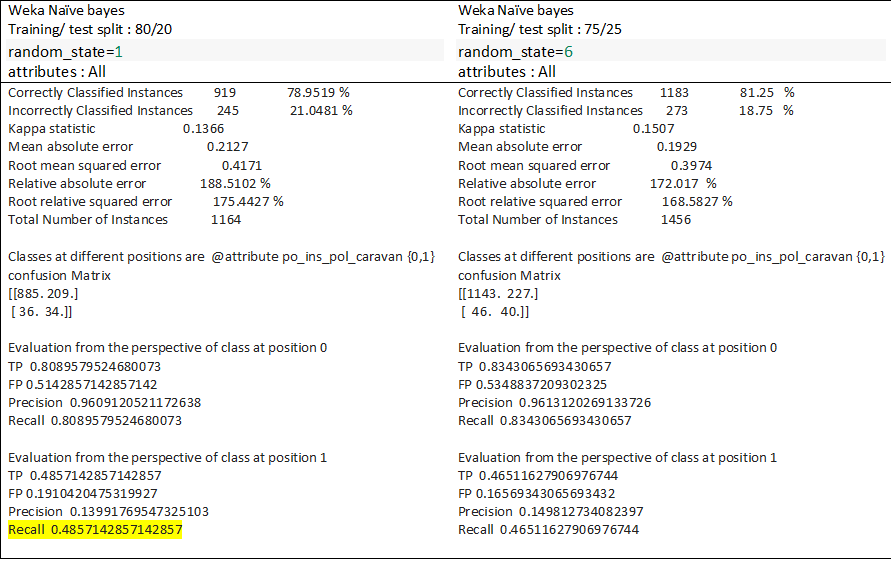

**Evaluation results with selected features.**

sd_income_avg
                     po_ins_pol_thirdparty_pvt
                     po_ins_pol_car
                     po_ins_pol_fire
                     po_ins_pol_boat
                     po_no_ins_pol_car
                     po_no_ins_pol_boat
                     po_no_ins_pol_socialsecurity

Correctly Classified Instances         819               93.8144 %
Incorrectly Classified Instances        54                6.1856 %

Classes at different positions are  @attribute po_ins_pol_caravan {0,1}
confusion Matrix
[[810.  13.]
 [ 41.   9.]]

Evaluation from the perspective of class at position 0
TP  0.9842041312272175
FP 0.82
Precision  0.9518213866039953
Recall  0.9842041312272175

Evaluation from the perspective of class at position 1
TP  0.18
FP 0.015795868772782502
Precision  0.4090909090909091
Recall  0.18


♈It resulting in low recall. Accuracy is 93%.  this is as our training dataset has small number of target = 1 records. Model is training well for target = 0 as there are more reords.

 Needs to train the model further to improve recall ♈

**Approach 2 - Decision Tree**

We are now going to train a decision tree. This decision tree is C4.5 decision tree and it's name in Weka is J48. Good thing about this decision tree is that it is the exact implementation of the C4.5 decision tree as in theory . C4.5 decision tree algorithm can handle numeric and categorical attributes by itself. So there is no need to convert categorical features(or variables) to numeric features by using on-hot-encoding.

In [274]:
# We are generating a pruned C4.5 decision tree, with a confidence factor used for pruning of 0.25.
# You can change it to different threshold values to change the size of the tree.
cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.7"])
cls.build_classifier(train)
# See the tree below.
print(cls)

J48 pruned tree
------------------

po_ins_pol_car = 0
|   po_ins_pol_boat = 0: 0 (1717.0/45.0)
|   po_ins_pol_boat = 1: 0 (1.0)
|   po_ins_pol_boat = 2: 0 (1.0)
|   po_ins_pol_boat = 3: 1 (1.0)
|   po_ins_pol_boat = 4: 0 (0.0)
|   po_ins_pol_boat = 5: 0 (2.0)
|   po_ins_pol_boat = 6: 0 (2.0/1.0)
po_ins_pol_car = 4: 0 (0.0)
po_ins_pol_car = 5
|   po_ins_pol_boat = 0
|   |   po_ins_pol_thirdparty_pvt = 0: 0 (209.0/2.0)
|   |   po_ins_pol_thirdparty_pvt = 1: 0 (4.0)
|   |   po_ins_pol_thirdparty_pvt = 2
|   |   |   po_ins_pol_fire = 0
|   |   |   |   sd_income_avg = 0: 0 (0.0)
|   |   |   |   sd_income_avg = 1: 0 (0.0)
|   |   |   |   sd_income_avg = 2: 0 (3.0)
|   |   |   |   sd_income_avg = 3: 0 (8.0/1.0)
|   |   |   |   sd_income_avg = 4: 0 (5.0)
|   |   |   |   sd_income_avg = 5: 1 (1.0)
|   |   |   |   sd_income_avg = 6: 0 (0.0)
|   |   |   |   sd_income_avg = 7: 0 (0.0)
|   |   |   |   sd_income_avg = 8: 0 (0.0)
|   |   |   |   sd_income_avg = 9: 0 (0.0)
|   |   |   po_ins_pol_fire

In the above tree, these values ": 1 (8.0/2.0)" means the class at the leaf is 1, total training records during evlaution on the training set after building the tree reached here are 8 but only 2 of them were incorrectly predicted.

In [ ]:
#import weka.plot.graph as graph  # If pygrpahviz is installed, you can plot the graph of tree too but it may not work
#graph.plot_dot_graph(cls.graph)

In [275]:
# Let's evaluate it on the test set

evl = Evaluation(train)
evl.test_model(cls, test)
print(evl.summary())


Correctly Classified Instances        2181               93.6453 %
Incorrectly Classified Instances       148                6.3547 %
Kappa statistic                          0.01  
Mean absolute error                      0.1045
Root mean squared error                  0.2385
Relative absolute error                 92.1232 %
Root relative squared error             98.355  %
Total Number of Instances             2329     



Here "Correctly Classified Instances"   means accuracy, and "Total Number of Instances" means total records in the test set.

In [276]:
# Here are all the metrics
#print ("Class Index ", class_idx)
print("Classes at different positions are ",data.attribute(class_idx))

print("confusion Matrix")
#Note that the TP here will be for the class at the first position printed by the previous line and TN will be for the class at second position
print(evl.confusion_matrix)

###############
# Print metrics for the first class
##############
class_position=0
print("")
print ("Evaluation from the perspective of class at position "+ str(class_position))
print("TP ",evl.true_positive_rate(class_position))
print("FP",evl.false_positive_rate(class_position))
print("Precision ",evl.precision(class_position))
print("Recall ",evl.recall(class_position))


###############
# Print metrics for the second class
##############
class_position=1
print("")
print ("Evaluation from the perspective of class at position "+ str(class_position))
print("TP ",evl.true_positive_rate(class_position))
print("FP",evl.false_positive_rate(class_position))
print("Precision ",evl.precision(class_position))
print("Recall ",evl.recall(class_position))


Classes at different positions are  @attribute po_ins_pol_caravan {0,1}
confusion Matrix
[[2.18e+03 3.00e+00]
 [1.45e+02 1.00e+00]]

Evaluation from the perspective of class at position 0
TP  0.9986257443884563
FP 0.9931506849315068
Precision  0.9376344086021505
Recall  0.9986257443884563

Evaluation from the perspective of class at position 1
TP  0.00684931506849315
FP 0.001374255611543747
Precision  0.25
Recall  0.00684931506849315


Evaluation results

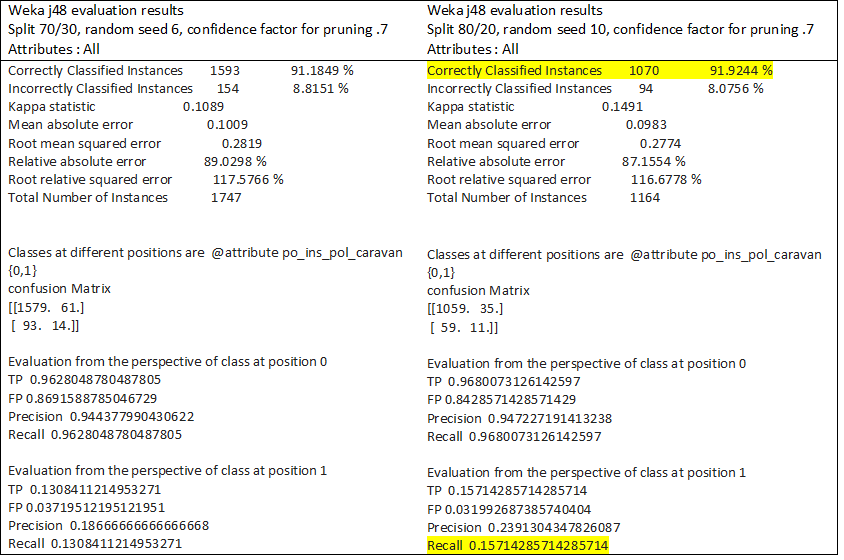


♈ We are trying to identify most caravan customers. the succes of the model is to correctly identify target = 1 values. Out of these 2 model results, I will select the model with recall = 0.157 on target = 1 and accuracy = 91%. ♈

# Feature selection

In [277]:

from weka.attribute_selection import ASSearch, ASEvaluation, AttributeSelection
search = ASSearch(classname="weka.attributeSelection.BestFirst", options=["-D", "1", "-N", "5"])
evaluator = ASEvaluation(classname="weka.attributeSelection.CfsSubsetEval", options=["-P", "1", "-E", "1"])
attsel = AttributeSelection()



attsel.search(search)
attsel.evaluator(evaluator)
attsel.select_attributes(data)

print("# attributes: " + str(attsel.number_attributes_selected))
print("attributes: " + str(attsel.selected_attributes))
print("result string:\n" + attsel.results_string)

# attributes: 8
attributes: [0 1 2 3 4 5 6 7 8]
result string:


=== Attribute Selection on all input data ===

Search Method:
	Best first.
	Start set: no attributes
	Search direction: forward
	Stale search after 5 node expansions
	Total number of subsets evaluated: 37
	Merit of best subset found:    0.038

Attribute Subset Evaluator (supervised, Class (nominal): 9 po_ins_pol_caravan):
	CFS Subset Evaluator
	Including locally predictive attributes

Selected attributes: 1,2,3,4,5,6,7,8 : 8
                     sd_income_avg
                     po_ins_pol_thirdparty_pvt
                     po_ins_pol_car
                     po_ins_pol_fire
                     po_ins_pol_boat
                     po_no_ins_pol_car
                     po_no_ins_pol_boat
                     po_no_ins_pol_socialsecurity



Weka's best first search method resulted into above attributes selection. Let's create a new copy of dataset with those attributes only

In [ ]:
#Filtering method 2
#Another way of filtering columns usingthe following code. Here we are keeping only features 1-4 and 7.
filtered_data=data.subset(col_range='42,44,47,59,61,68,82,85')


♈We will sue selected columns and run models and evaluate results. ♈

In [ ]:
#If you are done stop the JVM (Java Virtual Machine)
jvm.stop()

It turns out that Weka's python package is easier and comprehensive than other Python packages.



```
For CIND 119 course at Ryerson
  by Syed Shariyar Murtaza,Ph.D.
```

